# **Data Cleaning**

## Objectives

* Evaluate and handle missing data

* 
* Filter columns to keep the relevant ones
* One-hot encode language and gengre and drop the original


## Inputs

*   Kaggle JSON file - the authentication token.
*  raw_movie_data.csv
*  raw_movie_credits_data.csv

## Outputs

* Generate Dataset: outputs/datasets/collection/encoded_movies.csv

---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction'

---

# Load Collected data

In [4]:
import pandas as pd

# Load the saved datasets from outputs directory
df_movies = pd.read_csv("jupyter_notebooks/outputs/datasets/collection/raw_movie_data.csv")

# Verify the data loaded correctly
print("Movies Data Shape:", df_movies.shape)

# Preview both datasets
print("\nMovies Data Preview:")
print(df_movies.head())


Movies Data Shape: (4803, 20)

Movies Data Preview:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 7

---

---

# Data Cleaning

### Checking and handling missing data

Determining missing data

In [5]:
vars_with_missing_data = df_movies.columns[df_movies.isna().sum() > 0].to_list()
print(vars_with_missing_data)

['homepage', 'overview', 'release_date', 'runtime', 'tagline']


Handling missing data

In [6]:

df_movies['homepage'] = df_movies['homepage'].fillna('No homepage')
df_movies['overview'] = df_movies['overview'].fillna('No overview available')
df_movies['tagline'] = df_movies['tagline'].fillna('No tagline')
df_movies['runtime'] = df_movies['runtime'].fillna(df_movies['runtime'].median())
df_movies = df_movies.dropna(subset=['release_date'])

# Verify no missing values remain
print("\nMissing values after handling:")
print(df_movies.isnull().sum())


Missing values after handling:
budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


### Filtering the relevant variables

In [7]:
columns_to_keep = ['genres','original_language','budget', 'revenue', 'runtime']
df_movies_filtered = df_movies[columns_to_keep]

print("Filtered DataFrame with selected columns:")
print(df_movies_filtered.head())

Filtered DataFrame with selected columns:
                                              genres original_language  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...                en   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...                en   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...                en   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...                en   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...                en   

      budget     revenue  runtime  
0  237000000  2787965087    162.0  
1  300000000   961000000    169.0  
2  245000000   880674609    148.0  
3  250000000  1084939099    165.0  
4  260000000   284139100    132.0  


### One-hot encoding

One-hot encode genres

In [8]:
print(df_movies_filtered['genres'].head())

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object


In [9]:
import json

df_movies_filtered = df_movies[columns_to_keep].copy()

df_movies_filtered['genres'] = df_movies_filtered['genres'].apply(lambda x: [genre['name'] for genre in json.loads(x)])
genre_dummies = pd.get_dummies(df_movies_filtered['genres'].explode()).groupby(level=0).max()
df_movies_filtered = pd.concat([df_movies_filtered, genre_dummies], axis=1)

# Print the shape of the genre dummies
print("Genre Dummy Columns Shape:", genre_dummies.shape)

# Print the names of the new genre columns
print("\nNew Genre Columns:")
print(list(genre_dummies.columns))

Genre Dummy Columns Shape: (4802, 20)

New Genre Columns:
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


Drop foreign as genre, because it is not a genre

In [10]:
if 'Foreign' in genre_dummies.columns:
    # Drop the 'Foreign' column
    genre_dummies = genre_dummies.drop(columns=['Foreign'])
else:
    print("'Foreign' column not found in the genre_dummies DataFrame.")
    
# Print the updated shape of the genre dummies
print("Updated Genre Dummy Columns Shape:", genre_dummies.shape)

# Print the new names of the genre columns
print("\nUpdated Genre Columns:")
print(list(genre_dummies.columns))


Updated Genre Dummy Columns Shape: (4802, 19)

Updated Genre Columns:
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


One-hot encode language

In [11]:
print(df_movies_filtered['original_language'].head())

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object


Check the distribution of languages

In [12]:

language_counts = df_movies_filtered['original_language'].value_counts()
print("Distribution of languages:")
print(language_counts)

Distribution of languages:
en    4504
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64


One-Hot encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
df_movies_filtered['language_encoded'] = le.fit_transform(df_movies_filtered['original_language'])

print("First few rows of encoded languages:")
print(df_movies_filtered[['original_language', 'language_encoded']].head())

First few rows of encoded languages:
  original_language  language_encoded
0                en                 7
1                en                 7
2                en                 7
3                en                 7
4                en                 7


All the columns in the DataFrame after one-hot encoding

In [14]:
print(df_movies_filtered.columns)

Index(['genres', 'original_language', 'budget', 'revenue', 'runtime', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'language_encoded'],
      dtype='object')


Filter the original columns and keep only the encoded version

In [15]:
df_movies_filtered = df_movies_filtered.drop(['genres', 'original_language'], axis=1, errors='ignore')
print(df_movies_filtered.columns)

Index(['budget', 'revenue', 'runtime', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'language_encoded'],
      dtype='object')


---


PCA analysis

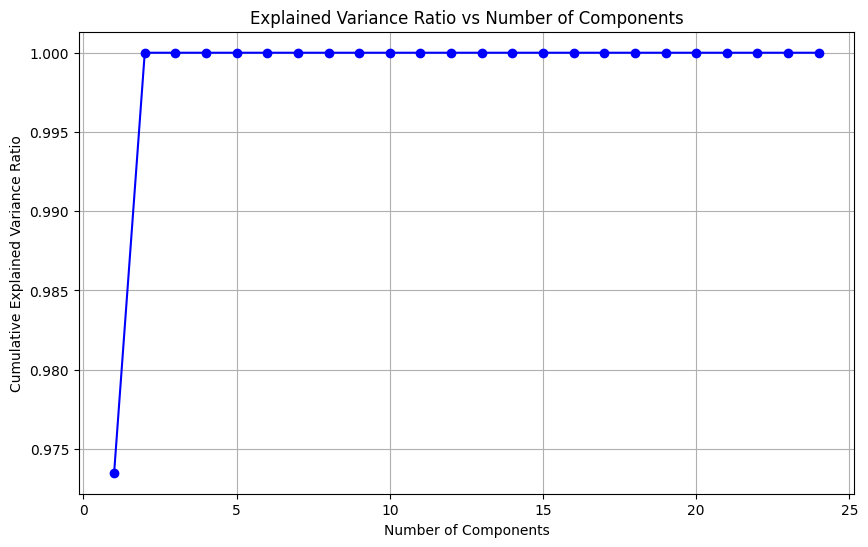


Explained variance ratio for first 5 components:
PC1: 0.973 (97.3%)
PC2: 0.027 (2.7%)
PC3: 0.000 (0.0%)
PC4: 0.000 (0.0%)
PC5: 0.000 (0.0%)

Top 5 contributing features for first 2 principal components:

PC1:
revenue             9.827780e-01
budget              1.847902e-01
runtime             3.472606e-08
language_encoded    1.063112e-09
Adventure           7.861879e-10
Name: PC1, dtype: float64

PC2:
budget              9.827780e-01
revenue             1.847902e-01
runtime             9.777260e-08
language_encoded    3.608960e-09
Action              3.597886e-09
Name: PC2, dtype: float64


In [22]:
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA 
# n_components=None will keep all components initially
pca = PCA(n_components=None)

# Fit and transform the data
pca_result = pca.fit_transform(df_movies_filtered)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create a plot to visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Print the explained variance for first few components
print("\nExplained variance ratio for first 5 components:")
for i, var in enumerate(explained_variance_ratio[:5], 1):
    print(f"PC{i}: {var:.3f} ({var*100:.1f}%)")

# Get feature loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(1, len(pca.components_) + 1)],
    index=df_movies_filtered.columns
)

# Show the top contributing features for first 2 PCs
print("\nTop 5 contributing features for first 2 principal components:")
for pc in ['PC1', 'PC2']:
    print(f"\n{pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head())

# Correlation and PPS Analysis

In [16]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Apply to numeric columns only
numeric_columns = ['runtime', 'budget']
df_movies[numeric_columns] = scaler.fit_transform(df_movies[numeric_columns])

In [21]:
print("Column names:", df_movies.columns.tolist())
print("Data types:", df_movies.dtypes)

Column names: ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']
Data types: budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import pandas as pd

def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True 
        
        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()

def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[df < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()

def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_movies)
    
    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')
    
    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))
    
    return df_corr_pearson, df_corr_spearman, pps_matrix

def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):
    
    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")
    
    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)
    
    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)
    
    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [18]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

NameError: name 'df' is not defined

In [ ]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

# Correlation and PPS Analysis

Calculate Correlations and Power Predictive Score

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)


Display at Heatmaps

In [ ]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

# Data Cleaning

## Assessing Missing Data Levels

Check missing data levels for the collected dataset.

In [ ]:
missing = df_movies.isnull().sum()
missing_percent = (missing / len(df_movies)) * 100

# Display results
print("Missing values summary:")
print("\nCount of missing values:")
print(missing[missing > 0])
print("\nPercentage of missing values:")
print(missing_percent[missing_percent > 0])

## Data Cleaning Spreadsheet Summary

No missing data found


### Split Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_movies[['original_language', 'budget', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']]
y = df_movies['revenue'] - df_movies ['budget']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

### Drop Variables

In [ ]:

print("Current columns:", df_movies.columns)


In [ ]:
f_movies = df_movies.drop('original_language', axis=1,inplace=True)
print("Columns after dropping 'original_language':", df_movies.columns)

# Push cleaned data to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') 
except Exception as e:
  print(e)

## Train Set

In [15]:
X_train.to_csv("outputs/datasets/cleaned/X_train_cleaned.csv", index=False)
y_train.to_csv("outputs/datasets/cleaned/y_train_cleaned.csv", index=False)

## Test Set

In [16]:
X_test.to_csv("outputs/datasets/cleaned/X_test_cleaned.csv", index=False)
y_test.to_csv("outputs/datasets/cleaned/y_test_cleaned.csv", index=False)

In [ ]:
print(os.listdir('outputs/datasets/cleaned'))

In [ ]:
import os
# Print current working directory
print("Current working directory:", os.getcwd())
# Print absolute path to one of the files
print("Full path to X_train:", os.path.abspath("outputs/datasets/cleaned/X_train_cleaned.csv"))